In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For saving/loading models
import pickle


In [ ]:
df = pd.read_csv('measures_v2.csv')

In [ ]:
print(df.head())

        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101        17.0  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417        17.0  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615        17.0  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303        17.0  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197        17.0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140098 entries, 0 to 140097
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   u_q             140098 non-null  float64
 1   coolant         140098 non-null  float64
 2   stator_winding  140098 non-null  float64
 3   u_d             140098 non-null  float64
 4   stator_tooth    140098 non-null  float64
 5   motor_speed     140098 non-null  float64
 6   i_d             140098 non-null  float64
 7   i_q             140098 non-null  float64
 8   pm              140097 non-null  float64
 9   stator_yoke     140097 non-null  float64
 10  ambient         140097 non-null  float64
 11  torque          140097 non-null  float64
 12  profile_id      140097 non-null  float64
dtypes: float64(13)
memory usage: 13.9 MB


In [ ]:
print(df.describe())

                 u_q        coolant  stator_winding            u_d  \
count  140098.000000  140098.000000   140098.000000  140098.000000   
mean       70.915275      18.763960       53.065486     -46.618159   
std        41.832706       0.436438       28.189264      49.272584   
min        -1.255789      15.594865       18.585815    -131.247696   
25%        29.922208      18.442884       26.369156     -89.591476   
50%        83.147827      18.716769       49.072046      -9.809341   
75%        96.944704      19.090565       72.017218      -0.723119   
max       131.707565      21.393656      131.437012       2.676198   

        stator_tooth    motor_speed            i_d            i_q  \
count  140098.000000  140098.000000  140098.000000  140098.000000   
mean       43.586939    2626.797105     -72.370705      64.047649   
std        18.641319    1773.620527      66.086217      72.649042   
min        18.133976      -0.006472    -246.089752      -0.017236   
25%        26.384508    

In [ ]:
print(f"\nDataset shape: {df.shape}")


Dataset shape: (140098, 13)


In [ ]:
print(df.isnull().sum())


u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                1
stator_yoke       1
ambient           1
torque            1
profile_id        1
dtype: int64


In [ ]:
df = df.drop('profile_id', axis=1)
print("\n'profile_id' column dropped.")


'profile_id' column dropped.


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    negative_values_count = (df[col] < 0).sum()
    if negative_values_count > 0:
        print(f"Column '{col}' has {negative_values_count} negative values.")
        if 'temperature' in col or col in ['motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q', 'psi_d', 'psi_q']:
            df[col] = df[col].apply(lambda x: max(x, 0))
print("\n--- Negative values after handling (capped at 0) ---")
for col in numerical_cols:
    if (df[col] < 0).sum() > 0:
        print(f"Column '{col}' still has negative values (this should not happen if cap to 0 was applied correctly).")

Column 'u_q' has 89 negative values.
Column 'u_d' has 125250 negative values.
Column 'motor_speed' has 31 negative values.
Column 'i_d' has 140090 negative values.
Column 'i_q' has 12 negative values.
Column 'torque' has 43868 negative values.

--- Negative values after handling (capped at 0) ---



--- Univariate Analysis: Histograms ---


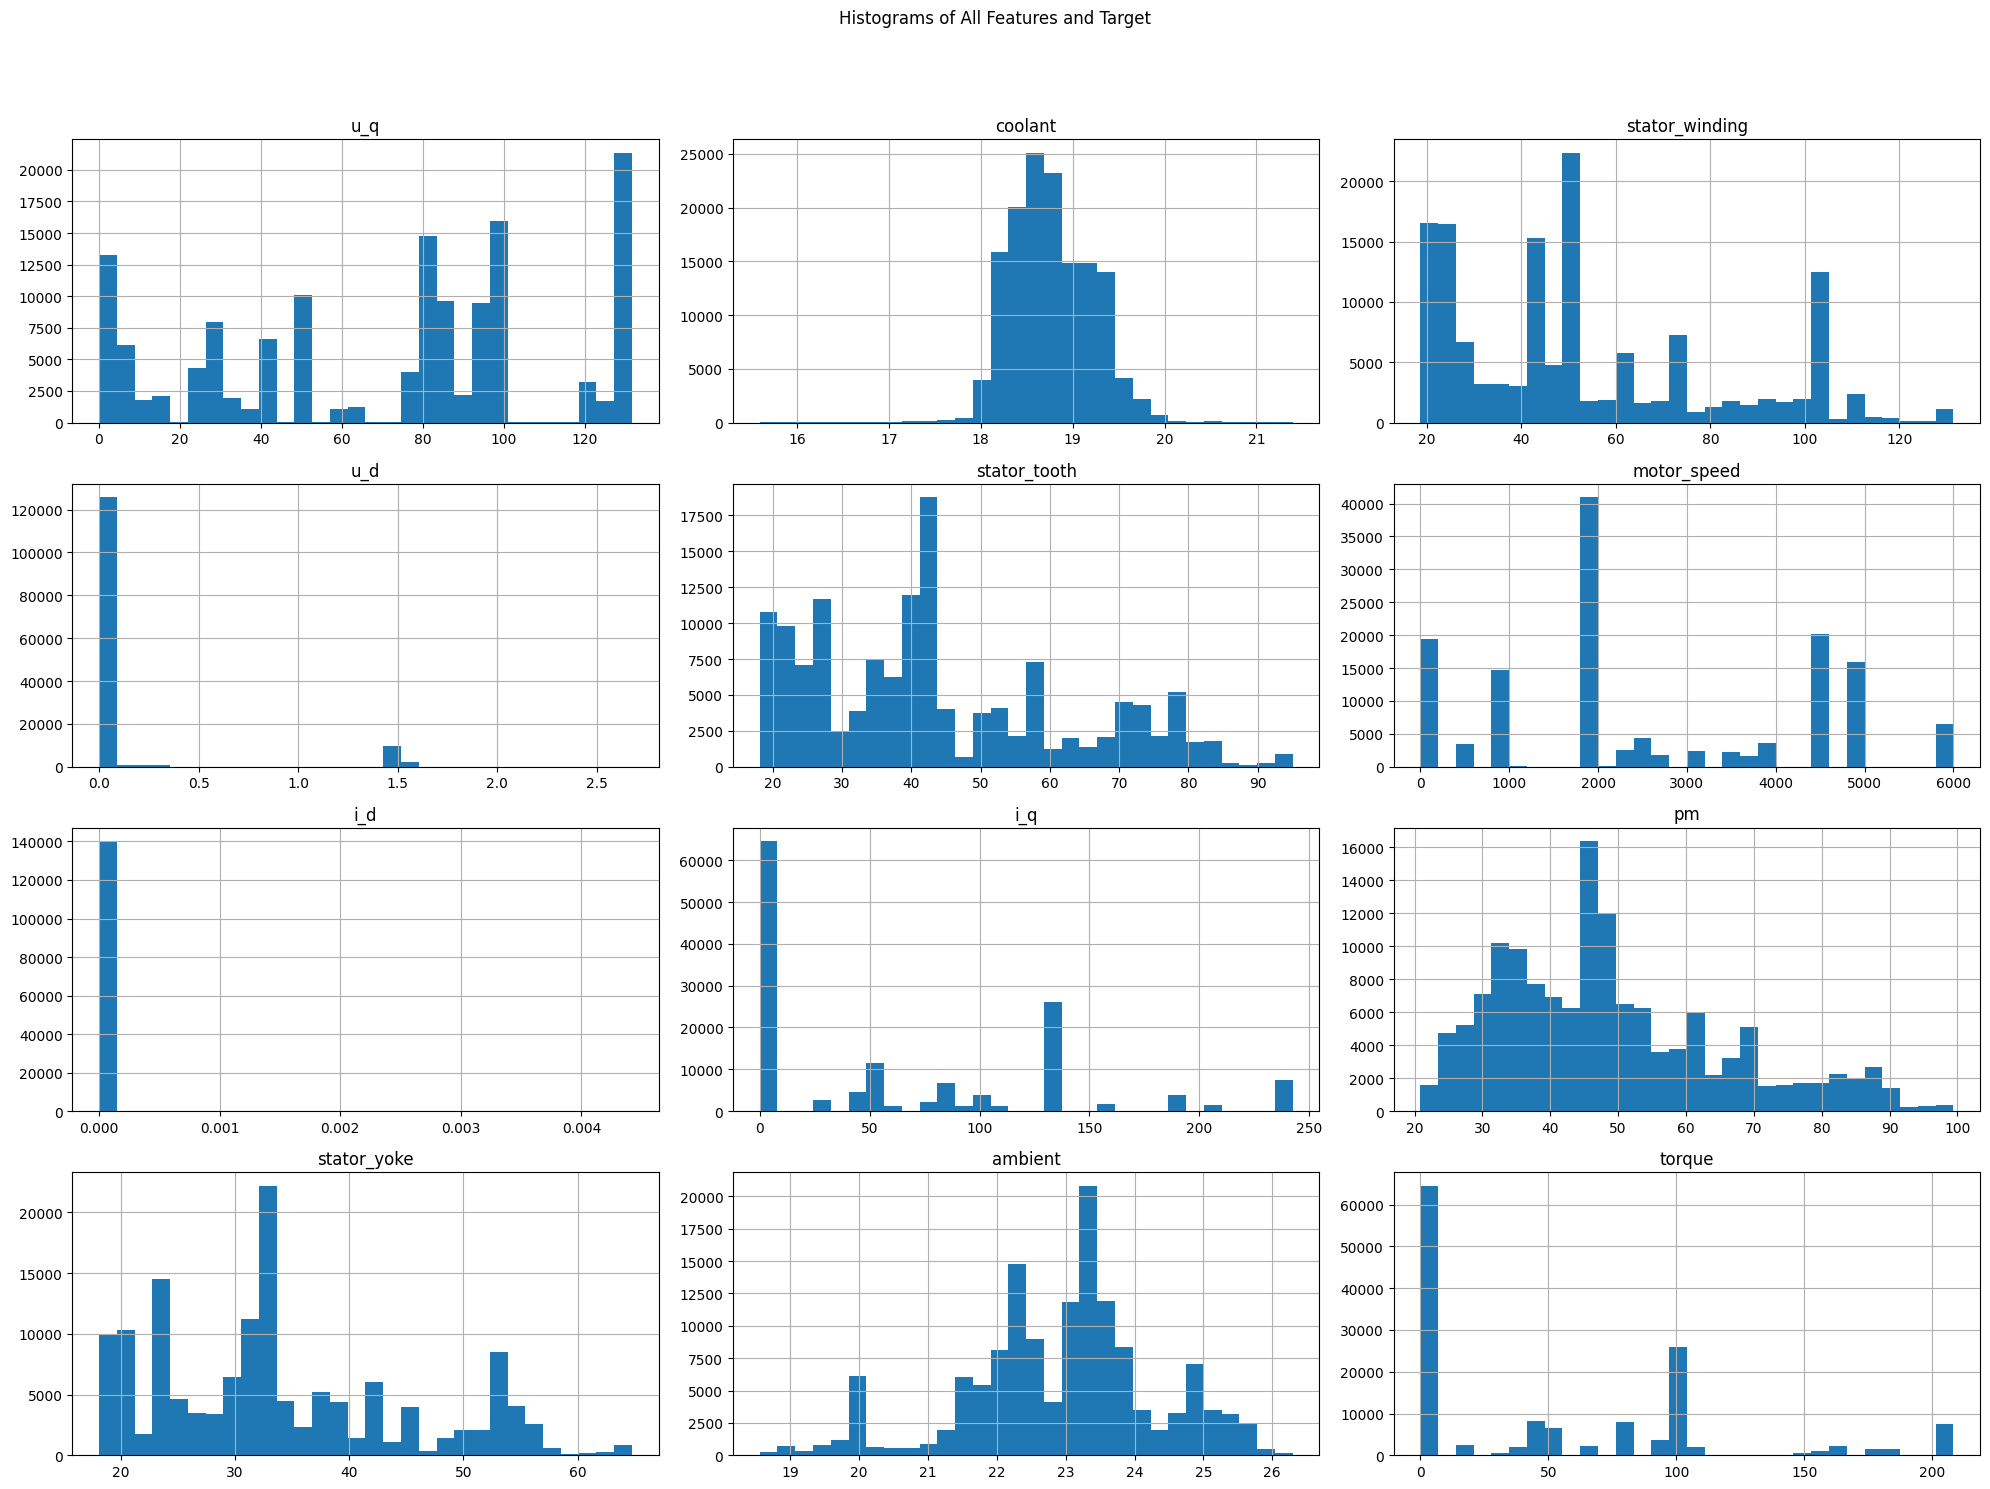

In [ ]:
print("\n--- Univariate Analysis: Histograms ---")
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of All Features and Target", y=1.02) # Adjusted title position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()


--- Univariate Analysis: Box Plots ---


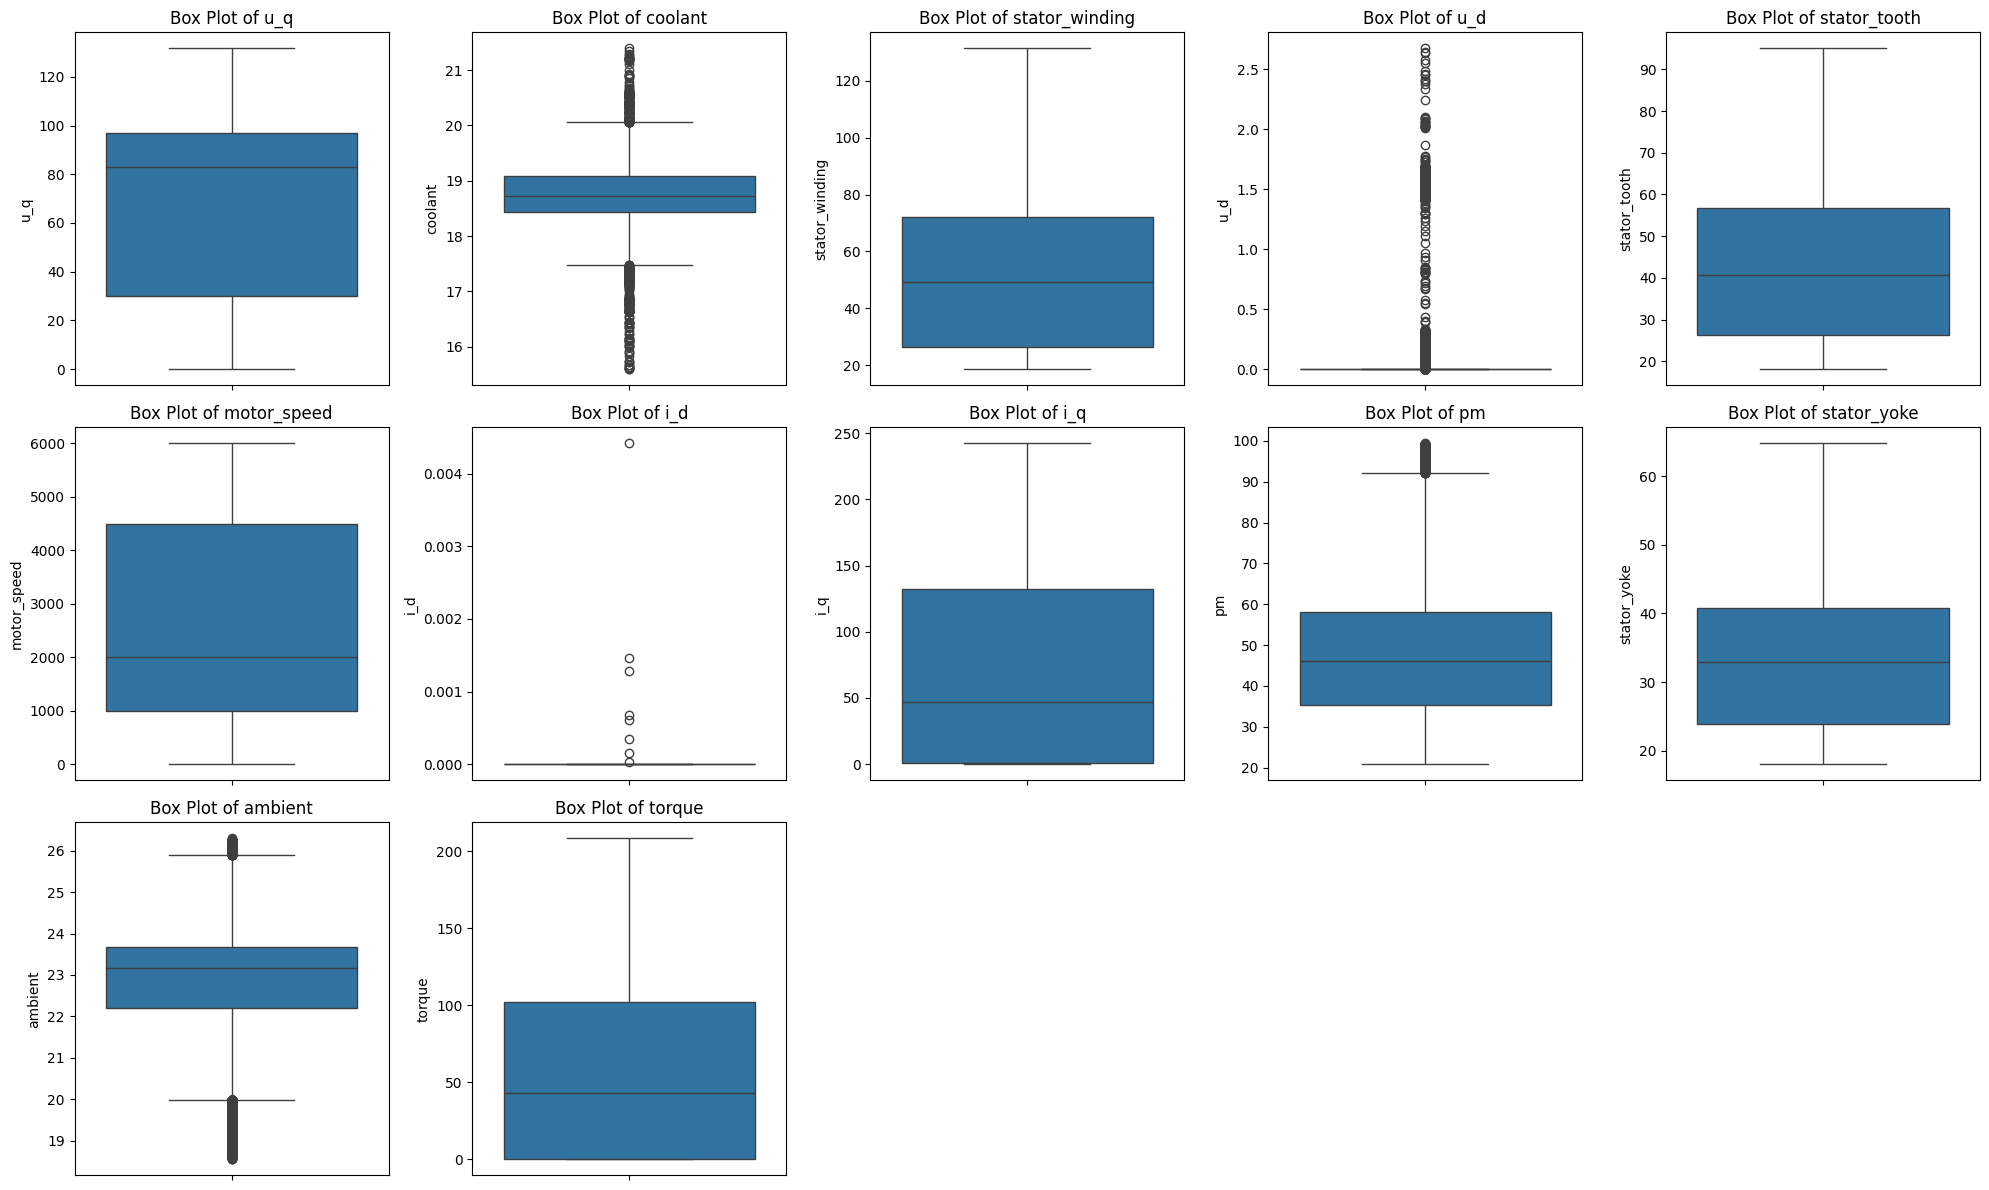

In [ ]:
print("\n--- Univariate Analysis: Box Plots ---")
num_cols = df.shape[1]
num_rows = (num_cols + 4) // 5 # Roughly 5 plots per row
plt.figure(figsize=(20, num_rows * 4)) # Adjust figure size dynamically
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 5, i + 1) # Adjust subplot grid based on number of columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


--- Multivariate Analysis: Correlation Matrix ---


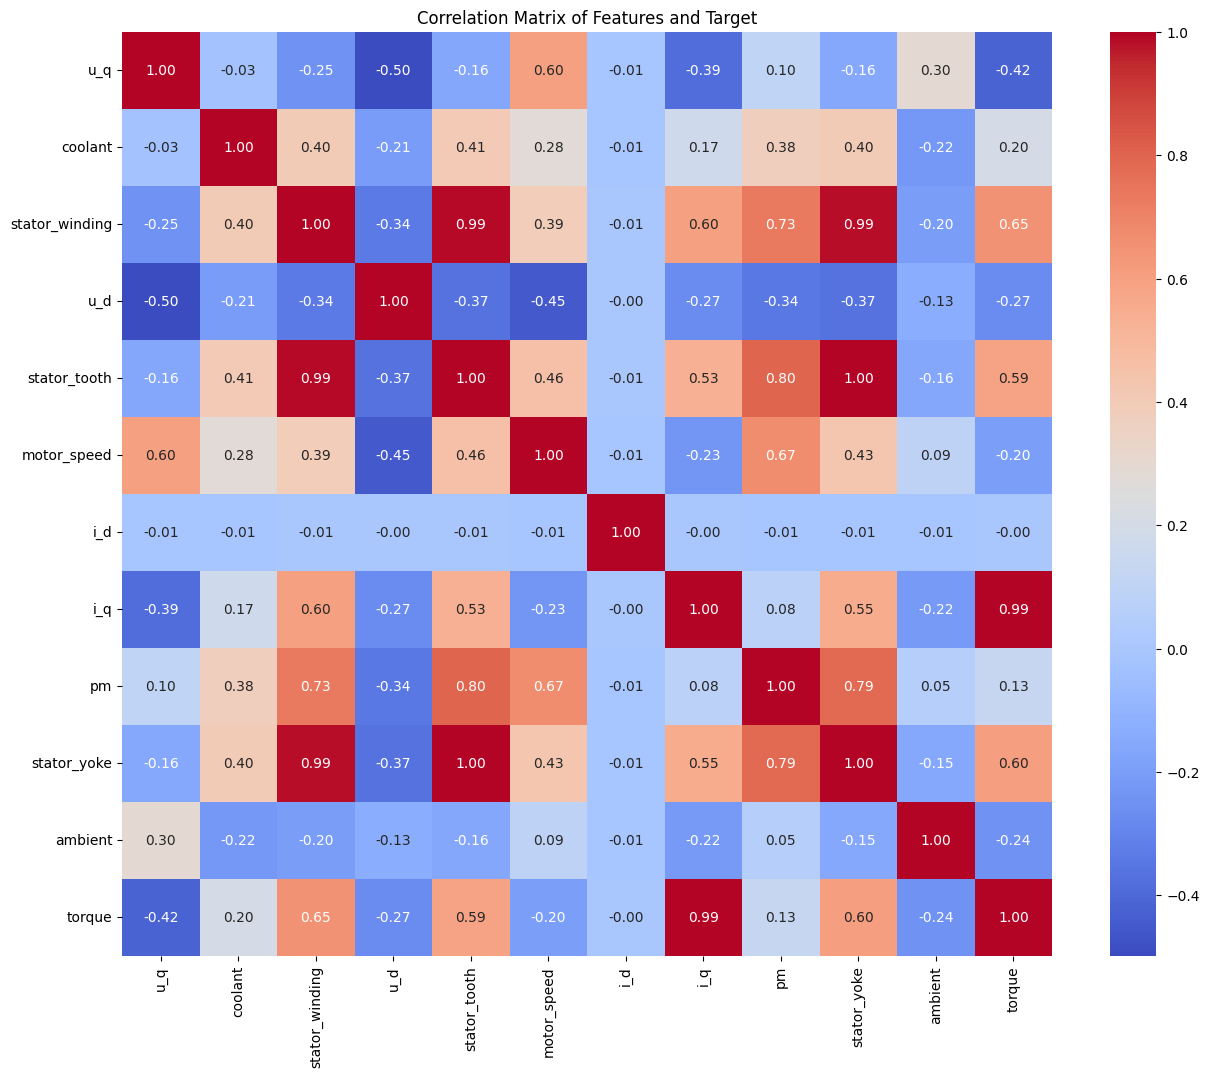

In [ ]:
print("\n--- Multivariate Analysis: Correlation Matrix ---")
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features and Target")
plt.show()

In [ ]:
target_col = 'pm' # Our target variable
correlations = df.corr()[target_col].sort_values(ascending=False)
print(f"\n--- Top correlations with {target_col} ---")
print(correlations)


--- Top correlations with pm ---
pm                1.000000
stator_tooth      0.799233
stator_yoke       0.788580
stator_winding    0.734724
motor_speed       0.670343
coolant           0.379422
torque            0.129493
u_q               0.104514
i_q               0.080077
ambient           0.053342
i_d              -0.007184
u_d              -0.341062
Name: pm, dtype: float64



--- Scatter plots of top 5 correlated features with 'pm' ---


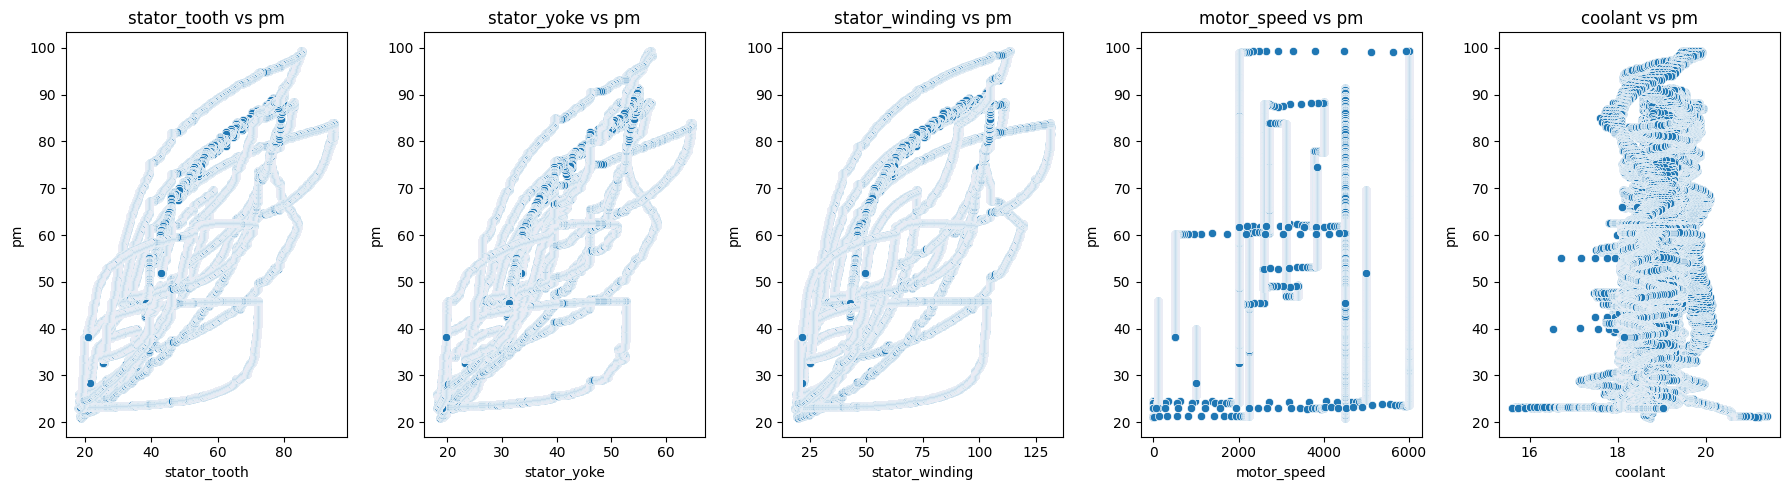

In [ ]:
top_n = 5
top_correlated_features = correlations[1:top_n+1].index.tolist()
print(f"\n--- Scatter plots of top {top_n} correlated features with '{target_col}' ---")
plt.figure(figsize=(18, 5))
for i, feature in enumerate(top_correlated_features):
    plt.subplot(1, top_n, i + 1)
    sns.scatterplot(x=df[feature], y=df[target_col])
    plt.title(f'{feature} vs {target_col}')
    plt.xlabel(feature)
    plt.ylabel(target_col)
plt.tight_layout()
plt.show()

In [ ]:
# Define features (X) and target (y)
target_col = 'pm' # Corrected to 'pm'
X = df.drop(columns=[target_col]) # All columns except the target
y = df[target_col] # The target column

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# --- IMPORTANT: Verify the features here ---
# This will print the list of columns that X_train contains.
# This list MUST match the 'input_features_columns' in your app.py file exactly.
print("\nColumns in X_train (features used for scaler):")
print(X_train.columns.tolist()) # This should now print 11 features
# --- End Verification ---

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


Features (X) shape: (140098, 11)
Target (y) shape: (140098,)

X_train shape: (112078, 11)
X_test shape: (28020, 11)
y_train shape: (112078,)
y_test shape: (28020,)

Columns in X_train (features used for scaler):
['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque']

Features scaled using StandardScaler.
X_train_scaled shape: (112078, 11)
X_test_scaled shape: (28020, 11)


In [ ]:
# Initialize a dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR() # Support Vector Regressor
}

# Dictionary to store evaluation metrics for each model
results = {}

print("\n--- Model Training and Evaluation ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Train the model with scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model using various regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # RMSE is often preferred as it's in the same unit as the target
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"{name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")

# Compare all models' performance
print("\n--- Model Comparison ---")
# Sort models by R2 score in descending order for easier comparison
sorted_results = sorted(results.items(), key=lambda item: item[1]['R2'], reverse=True)

for name, metrics in sorted_results:
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

# Identify the best performing model based on R-squared (higher is better)
best_model_name = sorted_results[0][0] # The first item in sorted_results will be the best
best_model = models[best_model_name]
print(f"\nBest performing model based on R-squared: {best_model_name}")


--- Model Training and Evaluation ---

Training Linear Regression...
Linear Regression Performance:
  Mean Absolute Error (MAE): 2.9395
  Mean Squared Error (MSE): 17.0445
  Root Mean Squared Error (RMSE): 4.1285
  R-squared (R2): 0.9384

Training Decision Tree...
Decision Tree Performance:
  Mean Absolute Error (MAE): 0.1098
  Mean Squared Error (MSE): 0.1073
  Root Mean Squared Error (RMSE): 0.3275
  R-squared (R2): 0.9996

Training Random Forest...
Random Forest Performance:
  Mean Absolute Error (MAE): 0.0900
  Mean Squared Error (MSE): 0.0506
  Root Mean Squared Error (RMSE): 0.2248
  R-squared (R2): 0.9998

Training SVM...
SVM Performance:
  Mean Absolute Error (MAE): 1.3867
  Mean Squared Error (MSE): 5.8673
  Root Mean Squared Error (RMSE): 2.4223
  R-squared (R2): 0.9788

--- Model Comparison ---

Random Forest:
  MAE: 0.0900
  MSE: 0.0506
  RMSE: 0.2248
  R2: 0.9998

Decision Tree:
  MAE: 0.1098
  MSE: 0.1073
  RMSE: 0.3275
  R2: 0.9996

SVM:
  MAE: 1.3867
  MSE: 5.8673
  RM

In [37]:
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"\nBest model '{best_model_name}' saved as '{model_filename}'")

# Save the scaler using pickle
# Ensure that the 'scaler' variable was initialized and fitted in the data splitting cell.
# If you restarted your kernel or only ran part of the previous cell, you might need to re-run it fully.
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved as '{scaler_filename}'")


Best model 'Random Forest' saved as 'model.pkl'
Scaler saved as 'scaler.pkl'


In [40]:
from sklearn import metrics

print(metrics.r2_score(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))


0.9787899263026238
0.9787899263026238
0.9787899263026238
0.9787899263026238


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
print(mean_squared_error(y_test,y_pred))

5.867330500117519


In [43]:
import joblib

In [45]:
joblib.dump(best_model,"model.save")

['model.save']

In [46]:
# Load the saved model
loaded_model = joblib.load("model.save")

# Create a sample data point for prediction (using the same features as the training data)
sample_data = {
    'u_q': [95.259972],
    'coolant': [18.197495],
    'stator_winding': [78.706779],
    'u_d': [0.0],
    'stator_tooth': [62.305267],
    'motor_speed': [55.225063],
    'i_d': [0.0],
    'i_q': [55.225063],
    'stator_yoke': [45.974915],
    'ambient': [24.922544],
    'torque': [48.919689]
}
sample_df = pd.DataFrame(sample_data)

# Scale the sample data using the saved scaler
sample_scaled = scaler.transform(sample_df)

# Make a prediction
prediction = loaded_model.predict(sample_scaled)
print(f"Predicted pm value: {prediction[0]}")

Predicted pm value: 64.24184551239014
